## Group 10 : Luca LEMARCHAND, Sandrine NEANG, Amina SIALI, Hugo TERRASSE

# Recurrent Neutral Network (RNN) Project

#### Dataset source : https://www.kaggle.com/datasets/sudalairajkumar/novel-corona-virus-2019-dataset?select=covid_19_data.csv

#### 2019 Novel Coronavirus (2019-nCoV) is a coronavirus identified as the cause of an outbreak of respiratory illness first detected in Wuhan, China. Early on, many of the patients in the outbreak in Wuhan, China reportedly had some link to a large seafood and animal market, suggesting animal-to-person spread. However, a growing number of patients reportedly have not had exposure to animal markets, indicating person-to-person spread is occurring. At this time, it’s unclear how easily or sustainably this virus is spreading between people.

#### This dataset has daily level information on the number of affected cases, deaths and recovery from 2019 novel coronavirus. Please note that this is a time series data and so the number of cases on any given day is the cumulative number.

#### This dataset cover confirmed cases of covid from January 22th, 2020 to 29th May, 2021

## I - Data Preprossessing

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the dataset

In [2]:
dataset = pd.read_csv('covid_19_data.csv')

In [3]:
dataset.shape

(306429, 8)

#### Display of the different types of variables

In [4]:
dataset.dtypes

SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object

#### By converting these columns to datetime format, we can manipulate and analyze the date and time information more easily. It allows us to perform time-series analysis, plot trends over time and extract specific time-related information such as month, day, or hour.

In [5]:
dataset['ObservationDate'] = pd.to_datetime(dataset['ObservationDate'])
dataset['Last Update'] = pd.to_datetime(dataset['Last Update'])

#### Quick overview of the structure and content of the dataset : display the first 10 rows of the dataset

In [6]:
dataset.head(10)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0
5,6,2020-01-22,Guangdong,Mainland China,2020-01-22 17:00:00,26.0,0.0,0.0
6,7,2020-01-22,Guangxi,Mainland China,2020-01-22 17:00:00,2.0,0.0,0.0
7,8,2020-01-22,Guizhou,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
8,9,2020-01-22,Hainan,Mainland China,2020-01-22 17:00:00,4.0,0.0,0.0
9,10,2020-01-22,Hebei,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0


#### Quick overview of the dataset : display the last 10 rows of the dataset

In [7]:
dataset.tail(10)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
306419,306420,2021-05-29,Yukon,Canada,2021-05-30 04:20:55,84.0,2.0,82.0
306420,306421,2021-05-29,Yunnan,Mainland China,2021-05-30 04:20:55,352.0,2.0,331.0
306421,306422,2021-05-29,Zabaykalsky Krai,Russia,2021-05-30 04:20:55,43126.0,669.0,41650.0
306422,306423,2021-05-29,Zacatecas,Mexico,2021-05-30 04:20:55,30758.0,2797.0,0.0
306423,306424,2021-05-29,Zakarpattia Oblast,Ukraine,2021-05-30 04:20:55,61611.0,1586.0,58882.0
306424,306425,2021-05-29,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,306426,2021-05-29,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,306427,2021-05-29,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,306428,2021-05-29,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0
306428,306429,2021-05-29,Zuid-Holland,Netherlands,2021-05-30 04:20:55,391559.0,4252.0,0.0


#### Display of the different types of variables

In [8]:
dataset.dtypes

SNo                         int64
ObservationDate    datetime64[ns]
Province/State             object
Country/Region             object
Last Update        datetime64[ns]
Confirmed                 float64
Deaths                    float64
Recovered                 float64
dtype: object

#### Creation of the dataset that we will use for the RNN model : We grouped the data by dates and we adapt the dataset with only the data that are useful for the prediction.

In [9]:
dataset_rnn = dataset.groupby(['ObservationDate']).agg({'Confirmed':'sum','Recovered':'sum','Deaths':'sum'})

In [10]:
dataset_rnn.shape

(494, 3)

#### Quick overview of the new dataset : display the first 10 rows of the dataset

In [11]:
dataset_rnn.head(10)

,Confirmed,Recovered,Deaths
ObservationDate,,,
2020-01-22,557.0,30.0,17.0
2020-01-23,1097.0,60.0,34.0
2020-01-24,941.0,39.0,26.0
2020-01-25,1437.0,42.0,42.0
2020-01-26,2118.0,56.0,56.0
2020-01-27,2927.0,65.0,82.0
2020-01-28,5578.0,108.0,131.0
2020-01-29,6165.0,127.0,133.0
2020-01-30,8235.0,145.0,171.0


#### Quick overview of the new dataset : display the last 10 rows of the dataset

In [12]:
dataset_rnn.tail(10)

,Confirmed,Recovered,Deaths
ObservationDate,,,
2021-05-20,165182316.0,101886760.0,3430539.0
2021-05-21,165808192.0,102501548.0,3443314.0
2021-05-22,166385987.0,103118309.0,3454660.0
2021-05-23,166862062.0,103620280.0,3464212.0
2021-05-24,167316362.0,104247872.0,3473036.0
2021-05-25,167848207.0,104824935.0,3485788.0
2021-05-26,168416423.0,105380748.0,3498544.0
2021-05-27,168970791.0,106078106.0,3511297.0
2021-05-28,169470725.0,106633069.0,3523117.0


### Importing the training set
#### By selecting only the confirmed cases column and the observations dates, we are creating a training set that consists of a time series of daily confirmed case counts. 

In [13]:
training_set = dataset_rnn.iloc[:,0:1].values

### Feature scaling

#### The purpose of scaling the data is to ensure that all values are on a similar scale and range, which can help to improve the performance of machine learning models.

In [14]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 45 timesteps

#### The resulting numpy arrays X_train and y_train will be used to train our recurrent neural network model to predict future values in the time series data.

In [15]:
X_train = []
y_train = []
for i in range(45, 180):
    X_train.append(training_set_scaled[i-45:i, 0])
    y_train.append(training_set_scaled[i, 0])
    
X_train, y_train = np.array(X_train) , np.array(y_train) 

### Reshaping
#### We are reshaping the data in order to transform the input data into a format that can be processed by the RNN model.

In [16]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## II - Building and Training the RNN

### Importing the libraries

In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

#### Sequential() is a class in the Keras API that allows us to create a neural network model as a linear stack of layers.

In [18]:
regressor = Sequential()

#### The LSTM layer takes a sequence of input data, has 50 neurons, and returns the entire sequence of outputs. 
#### The Dropout layer randomly drops out 20% of the neurons during training to prevent overfitting.

#### Therefore, adding multiple layers of LSTM and Dropout regularization can improve the performance of the model by allowing it to learn more complex temporal patterns and reduce overfitting.
#### Nevertheless, each additional LSTM layer adds more complexity to the model which allows the model to learn more complex dependencies between time steps. 
#### However, this complexity also increases the risk of overfitting, which is why the Dropout regularization is added to randomly drop out some neurons during training to force the model to learn more robust features.



### Adding the first LSTM layer and some Dropout regularisation

In [19]:
regressor.add(LSTM(units =50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [20]:
regressor.add(LSTM(units =50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [21]:
regressor.add(LSTM(units =50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [22]:
regressor.add(LSTM(units =50))
regressor.add(Dropout(0.2))

### Adding the output layer

#### Adding an output layer is essential for training our RNN to make predictions on a given task. The output layer is necessary to convert the output of the previous layers into the final predicted value.

In [23]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [24]:
regressor.compile(optimizer = 'adam', loss = 'mse')

### Fitting the RNN to the Training set

#### Fitting the RNN to the training set is the process of training the neural network to learn patterns and trends in the training data by adjusting the weights and biases of the network to minimize the difference between the predicted output and the actual output.

In [25]:
regressor.compile(optimizer = 'adam', loss = 'mse')

regressor.fit(X_train, y_train, epochs = 50, batch_size = 5)

Epoch 1/50
27/27 [==============================] - 7s 67ms/step - loss: 4.1325e-04
Epoch 2/50
27/27 [==============================] - 2s 80ms/step - loss: 8.5245e-05
Epoch 3/50
27/27 [==============================] - 2s 83ms/step - loss: 3.8076e-05
Epoch 4/50
27/27 [==============================] - 2s 75ms/step - loss: 3.0309e-05
Epoch 5/50
27/27 [==============================] - 2s 60ms/step - loss: 2.9774e-05
Epoch 6/50
27/27 [==============================] - 2s 66ms/step - loss: 4.7162e-05
Epoch 7/50
27/27 [==============================] - 2s 56ms/step - loss: 2.8554e-05
Epoch 8/50
27/27 [==============================] - 2s 83ms/step - loss: 2.9479e-05
Epoch 9/50
27/27 [==============================] - 2s 83ms/step - loss: 2.7756e-05
Epoch 10/50
27/27 [==============================] - 2s 59ms/step - loss: 2.2264e-05
Epoch 11/50
27/27 [==============================] - 2s 59ms/step - loss: 2.7090e-05
Epoch 12/50
27/27 [==============================] - 2s 64ms/step - loss: 

## III - Making the predictions and visualising the results

### Getting the real and predicted confirmed cases 

In [26]:
#Real confirmed cases
real_confirmed_cases = dataset_rnn.iloc[170:213,0:1].values

#Creation of the testing set
X_test = []

for i in range(170,213):
    X_test.append(training_set_scaled[i-45:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#Predictions
predicted_confirmed_cases = regressor.predict(X_test)
predicted_confirmed_cases = sc.inverse_transform(predicted_confirmed_cases)

2/2 [==============================] - 2s 31ms/step


### Visualising the results

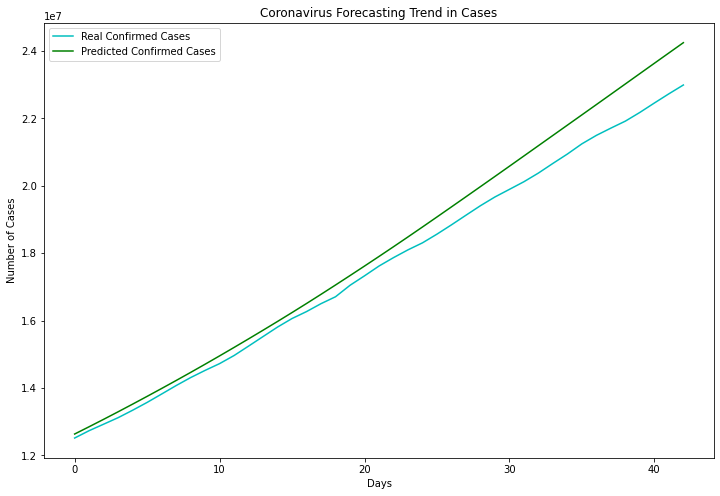

In [27]:
plt.figure(figsize = (12,8))
plt.plot(real_confirmed_cases, color='c', label = 'Real Confirmed Cases')
plt.plot(predicted_confirmed_cases, color='g', label = 'Predicted Confirmed Cases')
plt.title('Coronavirus Forecasting Trend in Cases')
plt.xlabel('Days')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()

#### According to this visualizations, the predicted confirmed cases are well predicted because we notice that the green line is almost identical to the blue one which represent the real confirmed cases. It shows indeed that our predictions is very accurate. 
#### The predictions of our RNN model are quite similar to the real confirmed cases so our model is performing very well considering the limited amount of days to train the model on.

In [28]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(real_confirmed_cases, predicted_confirmed_cases)
accuracy = 1 - mse/np.var(real_confirmed_cases)
print("Accuracy rate:", accuracy)

Accuracy rate: 0.962997094057521


#### We can see that our accuracy rate is very close to 1 which shows that the visualization is accurate.